Графический метод решения задачи линейного программирования

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import HTML

%matplotlib notebook

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
count = 0 # подсчет количества неравенств-ограничений

print('Введите количество ограничений')
n = int(input())

cel = np.array([0, 0]) #массив для целевой функции
constr = np.zeros((n,4), dtype=int)
points = np.zeros((n,4), dtype=float)

print('Выберите тип уравнения(макс/мин?)')
extr = str(input())

print('Введите коеффициенты целевой функции')
for i in range(cel.size):
 cel[i]=int(input())

print('F = '+ str(cel[0]) + 'x'+' + ' + str(cel[1]) + 'y ->' + extr)
print(cel)
constr

for i in range(n):
    count+=1
    print("Введите коеффициенты " + str(count) + " неравенства")
    for j in range(4):
        constr[i][j]=int(input())

constr

Введите количество ограничений
3
Выберите тип уравнения(макс/мин?)
min
Введите коеффициенты целевой функции
1
2
F = 1x + 2y ->min
[1 2]
Введите коеффициенты 1 неравенства
5
-2
0
7
Введите коеффициенты 2 неравенства
-1
2
0
5
Введите коеффициенты 3 неравенства
1
1
0
6


array([[ 5, -2,  0,  7],
       [-1,  2,  0,  5],
       [ 1,  1,  0,  6]])

In [3]:
for i in range(n):
    res = float(constr[i][3]/constr[i][0]) #приравниваем к нулю Y
    res1 = float(constr[i][3]/constr[i][1]) #приравниваем к нулю X
    points[i][0] = res
    points[i][3] = res1
points

array([[ 1.4,  0. ,  0. , -3.5],
       [-5. ,  0. ,  0. ,  2.5],
       [ 6. ,  0. ,  0. ,  6. ]])

In [4]:
m1 = np.array([[constr[0][0],constr[0][1]], [constr[1][0], constr[1][1]]])
v1 = np.array([constr[0][3],constr[1][3]])

m2 = np.array([[constr[0][0],constr[0][1]], [constr[2][0], constr[2][1]]])
v2 = np.array([constr[0][3],constr[2][3]])

m3 = np.array([[constr[1][0],constr[1][1]], [constr[2][0], constr[2][1]]])
v3 = np.array([constr[1][3],constr[2][3]])

f_line = np.linalg.solve(m1,v1)
s_line = np.linalg.solve(m2,v2)
th_line = np.linalg.solve(m3,v3)

c = np.concatenate((f_line,s_line, th_line), axis=0)
b = c.reshape(-1, 2)

print(b)

extrem = np.zeros(n, dtype=float)
for i in range(n):
    extrem[i] = cel[0]*b[i][0] + cel[1]*b[i][1]

[[3.         4.        ]
 [2.71428571 3.28571429]
 [2.33333333 3.66666667]]


In [5]:
def f_iter():
    coefficients = np.zeros((10), dtype=object)
    polynomial = np.zeros((10), dtype=object)
    x_axis = np.zeros((10), dtype=object)
    y_axis = np.zeros((10), dtype=object)

    ### Отрисовка линий после задающих их точек

    for i in range(n):
        coefficients[i] = np.polyfit([points[i][0], 0.0], [0.0, points[i][3]], 1)

    for i in range(n):
        polynomial[i] = np.poly1d(coefficients[i])

    for i in range(n):
        x_axis[i] = np.linspace(-2, 7)

    for i in range(n):
        y_axis[i] = polynomial[i](x_axis[i])

    ######

    #создание новой фигуры и ограничение для линейных графиков
    fig = plt.figure()
    
    axes = fig.add_subplot(111)
    axes.set_xlim(-1, 6)
    axes.set_ylim(-1, 6)
    plt.title('Построение функций по ограничениям', fontsize=14)
    plt.xlabel('Ось X', fontsize=12, color='black')
    plt.ylabel('Ось Y', fontsize=12, color='black')

    for i in range(n):
        axes.plot(x_axis[i], y_axis[i])

    #отрисовка точек по заданым параметрам
    for i in range(n):
        axes.plot(points[i][0], 0.0, 0.0, points[i][3], marker='o', color='black')

    #построение декартовой системы координат
    left,right = axes.get_xlim()
    low,high = axes.get_ylim()
    
    axes.grid(True)
    arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
    arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )

    ##### отрисовка точек пересечния прямых
    
def s_iter():
    coefficients = np.zeros((10), dtype=object)
    polynomial = np.zeros((10), dtype=object)
    x_axis = np.zeros((10), dtype=object)
    y_axis = np.zeros((10), dtype=object)

    ### Отрисовка линий после задающих их точек

    for i in range(n):
        coefficients[i] = np.polyfit([points[i][0], 0.0], [0.0, points[i][3]], 1)

    for i in range(n):
        polynomial[i] = np.poly1d(coefficients[i])

    for i in range(n):
        x_axis[i] = np.linspace(-2, 7)

    for i in range(n):
        y_axis[i] = polynomial[i](x_axis[i])

    ######

    #создание новой фигуры и ограничение для линейных графиков
    fig = plt.figure()
    
    axes = fig.add_subplot(111)
    axes.set_xlim(-1, 6)
    axes.set_ylim(-1, 6)
    
    plt.title('Построение радиус-вектора', fontsize=14)
    plt.xlabel('Ось X', fontsize=12, color='black')
    plt.ylabel('Ось Y', fontsize=12, color='black')

    for i in range(n):
        axes.plot(x_axis[i], y_axis[i])

    #отрисовка точек по заданым параметрам
    for i in range(n):
        axes.plot(points[i][0], 0.0, 0.0, points[i][3], marker='o', color='black')

    #построение декартовой системы координат
    left,right = axes.get_xlim()
    low,high = axes.get_ylim()

    arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
    arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )

    ##### отрисовка точек пересечния прямых
    axes.grid(True)
    axes.plot(f_line[0],f_line[1], marker = 'o', color='orangered')
    axes.plot(s_line[0],s_line[1], marker = 'o', color='orangered')
    axes.plot(th_line[0],th_line[1], marker = 'o', color='orangered')
    
def parall():
    def f(x):
        return -0.5*x + 2.5
    y = np.vectorize(f)
    x = np.linspace( -20.0, 20.0, 50)
    plt.grid(True)
    plt.plot(x,y(x))
    

def gradient():
    def f1(x):
        return 2*x + 0
    y = np.vectorize(f1)
    x = np.linspace(0, 1, 50)
    plt.grid(True)
    plt.plot(x,y(x))
    plt.plot([0,1],[0,2], marker = "o")
    
def th_iter():
    coefficients = np.zeros((10), dtype=object)
    polynomial = np.zeros((10), dtype=object)
    x_axis = np.zeros((10), dtype=object)
    y_axis = np.zeros((10), dtype=object)

    ### Отрисовка линий после задающих их точек

    for i in range(n):
        coefficients[i] = np.polyfit([points[i][0], 0.0], [0.0, points[i][3]], 1)

    for i in range(n):
        polynomial[i] = np.poly1d(coefficients[i])

    for i in range(n):
        x_axis[i] = np.linspace(-2, 7)

    for i in range(n):
        y_axis[i] = polynomial[i](x_axis[i])

    ######

    #создание новой фигуры и ограничение для линейных графиков
    fig = plt.figure()
    
    axes = fig.add_subplot(111)
    axes.set_xlim(-1, 6)
    axes.set_ylim(-1, 6)
    
    plt.title('Определение минимальной точки геометрическим способом', fontsize=13)
    plt.xlabel('Ось X', fontsize=12, color='black')
    plt.ylabel('Ось Y', fontsize=12, color='black')

    for i in range(n):
        axes.plot(x_axis[i], y_axis[i])

    #отрисовка точек по заданым параметрам
    for i in range(n):
        axes.plot(points[i][0], 0.0, 0.0, points[i][3], marker='o', color='black')

    #построение декартовой системы координат
    left,right = axes.get_xlim()
    low,high = axes.get_ylim()

    arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
    arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )

    ##### отрисовка точек пересечния прямых
    axes.grid(True)
    axes.plot(f_line[0],f_line[1], marker = 'o', color='orangered')
    axes.plot(s_line[0],s_line[1], marker = 'o', color='orangered')
    axes.plot(th_line[0],th_line[1], marker = 'o', color='orangered')
    
    return fig
    
def line_anim(fig):
    
    def f(x):
        return -0.5*x + 2.5
    
    y = np.vectorize(f)
    x = np.linspace( -20.0, 20.0, 50)
    p_line, = plot(x,y(x))

    def animate(i):
        p_line.set_data(x,y(x)+i*0.05)
        return p_line,

    anima = FuncAnimation(fig, animate, frames=140, interval=50,blit = True)
    
t1 = plt.Polygon(b[:3,:], facecolor="blue", lw=0, alpha=0.2)

<IPython.core.display.Javascript object>


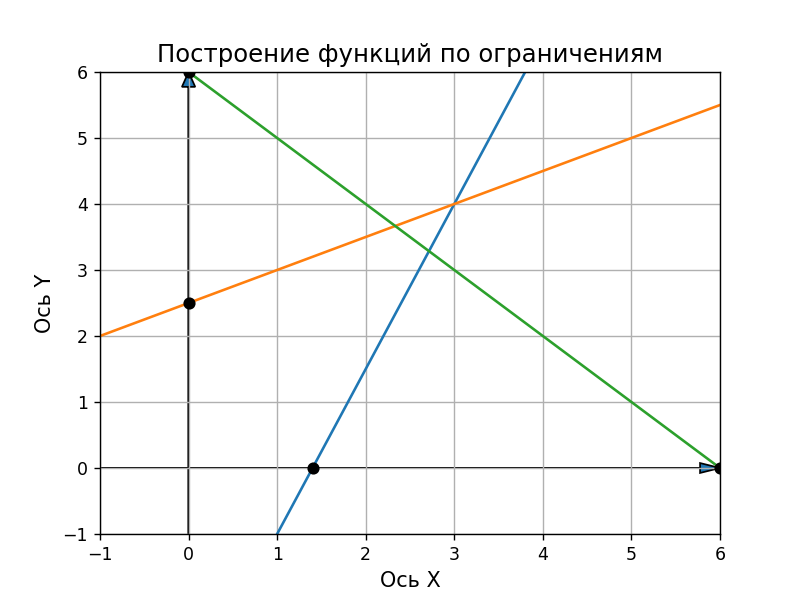

<IPython.core.display.Javascript object>


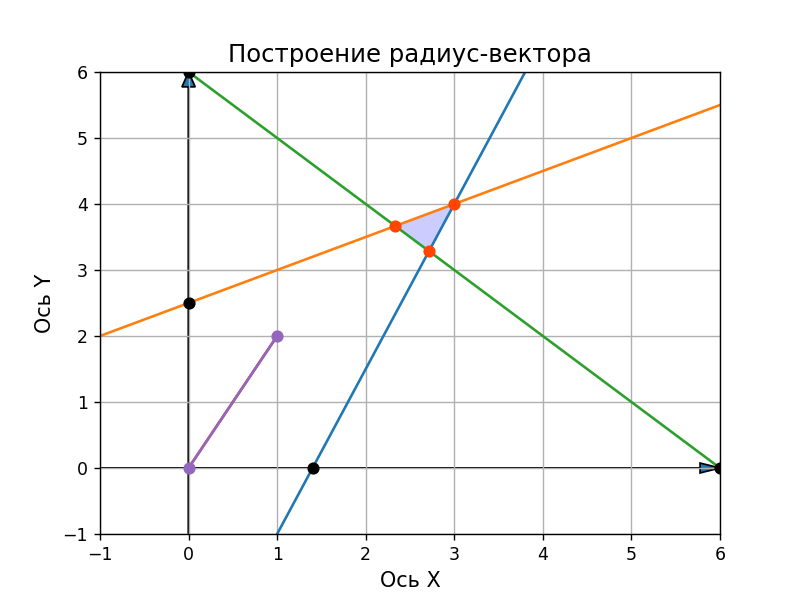

<IPython.core.display.Javascript object>


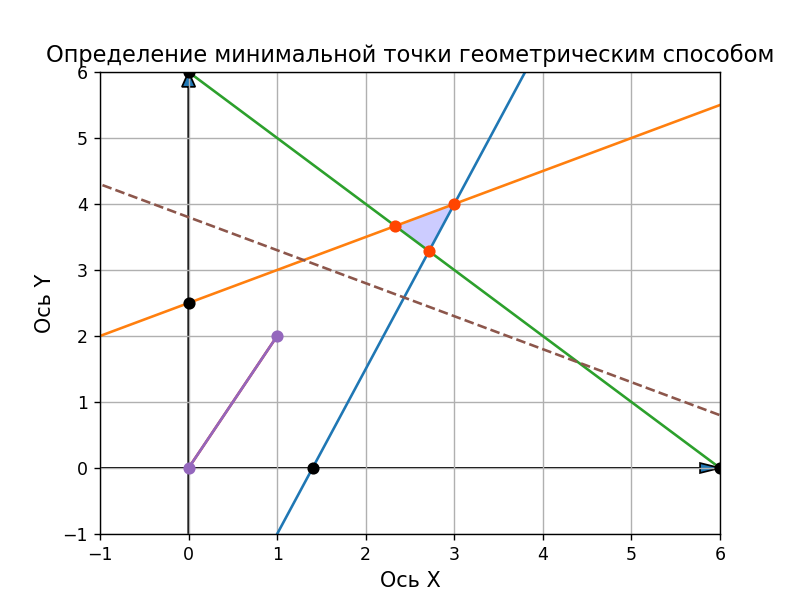

In [6]:
f_iter()
s_iter()
t1 = plt.Polygon(b[:3,:], facecolor="blue", lw=0, alpha=0.2)
plt.gca().add_patch(t1)
gradient()
lol = th_iter()
t2 = plt.Polygon(b[:3,:], facecolor="blue", lw=0, alpha=0.2)
plt.gca().add_patch(t2)
gradient()

def f(x):
    return -0.5*x + 2.5
    
y = np.vectorize(f)
x = np.linspace( -20.0, 20.0, 50)
p_line, = plot(x,y(x), linestyle = '--')

def animate(i):
    p_line.set_data(x,y(x)+i*0.05)
    return p_line,

anima = FuncAnimation(lol, animate, frames=43, interval=50,blit = True)



In [7]:
print(b)

[[3.         4.        ]
 [2.71428571 3.28571429]
 [2.33333333 3.66666667]]


In [8]:
extrem = np.zeros(n, dtype=float)
for i in range(n):
    extrem[i] = cel[0]*b[i][0] + cel[1]*b[i][1]
extrem
if (extr == 'max'):
    answer = np.amax(extrem)
if (extr == 'min'):
    answer = np.amin(extrem)
extr
print(extrem)
print("Значение целевой функции равно:" + str(answer))

[11.          9.28571429  9.66666667]
Значение целевой функции равно:9.285714285714285
